## Observations and Insights 

In [1]:
# 1 Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata = pd.DataFrame(mouse_metadata)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
len(mouse_metadata)

249

In [3]:
study_results = pd.read_csv(study_results_path)
study_results = pd.DataFrame(study_results)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
len(study_results)

1893

In [5]:
# 2 Combine the data into a single dataset
# concatenate?
# frames = [mouse_metadata, study_results]
# merged_df = pd.concat(frames)

# or append?
# merged_df = mouse_metadata.append(study_results)

# or join?
# merged_df = pd.DataFrame.join(mouse_metadata, study_results)

# or merge?
merged_df = mouse_metadata.merge(study_results)

merged_df = pd.DataFrame(merged_df)
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# 3a Getting the duplicate mice by ID number
# that shows up for Mouse ID and Timepoint.

In [7]:
# 3b Optional: Get all the data for the duplicate mouse ID. 


In [8]:
duplicateMouse = merged_df[merged_df.duplicated()]
duplicateMouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [9]:
# 3c Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [10]:
merged_df = merged_df.loc[merged_df["Mouse ID"]!="g989"]
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# 3d Checking the number of mice in the clean DataFrame.

In [12]:
# Checking the number of mice in the studies:
miceCount = merged_df.groupby(["Mouse ID"]).count()["Age_months"]
# miceCount

n = len(miceCount)
n

248

In [13]:
print(merged_df.dtypes)

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object


In [14]:
# turn NaN to ""
merged_df = merged_df.fillna({"Drug Regimen": ""})
merged_df = merged_df.fillna({"Sex": ""})
merged_df = merged_df.fillna({"Age_months": ""})
merged_df = merged_df.fillna({"Weight (g)": ""})
merged_df = merged_df.fillna({"Timepoint": ""})
merged_df = merged_df.fillna({"Tumor Volume (mm3)": ""})
merged_df = merged_df.fillna({"Metastatic Sites": ""})

# change dtype to numeric
merged_df[["Age_months"]] = merged_df[["Age_months"]].apply(pd.to_numeric, downcast = "integer")
merged_df[["Weight (g)"]] = merged_df[["Weight (g)"]].apply(pd.to_numeric, downcast = "integer")
merged_df[["Timepoint"]] = merged_df[["Timepoint"]].apply(pd.to_numeric, downcast = "integer")
merged_df[["Tumor Volume (mm3)"]] = merged_df[["Tumor Volume (mm3)"]].apply(pd.to_numeric)
merged_df[["Metastatic Sites"]] = merged_df[["Metastatic Sites"]].apply(pd.to_numeric, downcast = "integer")
# Why doesn't downcast as integer work?
# merged_df.head()

In [15]:
print(merged_df.dtypes)

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months               int8
Weight (g)               int8
Timepoint                int8
Tumor Volume (mm3)    float64
Metastatic Sites         int8
dtype: object


In [16]:
# Checking what drug regimens were studied
regimens = merged_df.groupby("Drug Regimen").count()
regimens

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [17]:
# How many regimens were there?
regimenCount = len(regimens)
regimenCount

10

In [18]:
# This turns Drug Regimen from the index to a column of values...:
regimens = pd.DataFrame(regimens.index.tolist(), columns=["Drug Regimen"])
regimens

,Drug Regimen
0,Capomulin
1,Ceftamin
2,Infubinol
3,Ketapril
4,Naftisol
5,Placebo
6,Propriva
7,Ramicane
8,Stelasyn
9,Zoniferol


In [19]:
# ...and this reads those values into a list:
regimens = regimens["Drug Regimen"].tolist()
regimens

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

## Summary Statistics

In [20]:
# 4 Generate a summary statistics table of mean, median, variance,
# standard deviation, and SEM of the tumor volume for each regimen
# miceCount.describe()

In [21]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [22]:
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
tumorVolMean = merged_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumorVolMed = merged_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumorVolVar = merged_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumorVolStdDev = merged_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumorVolSEM = merged_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_df_verbose = pd.DataFrame({
    "Drug Regimen" : regimens,
    "Mean" : tumorVolMean,
     "Median" : tumorVolMed,
     "Variance" : tumorVolVar,
     "Std Deviation" : tumorVolStdDev,
     "Std Error of the Mean" : tumorVolSEM    
    })

#### Tumor Volume (mm3) by regimen

In [24]:
# 5 Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df_verbose

,Drug Regimen,Mean,Median,Variance,Std Deviation,Std Error of the Mean
Drug Regimen,,,,,,
Capomulin,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# 6 Using the aggregation method, produce the same summary statistics in a single line
# @TA Farshad: "You are allowed to use group by in the 2nd method.
# The instructions is asking to create a summary table with a single line of code
# (versus creating a series each for mean, median, var, etc. and then creating a data frame).
# Please research pandas GroupBy.aggregate function.
# This is the URL of the current pandas documentation on GroupBy.aggregate:
# https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html?highlight=groupby%20aggregate#pandas.core.groupby.DataFrameGroupBy.aggregate
# which mentions Different aggregations per column
# df.groupby('A').agg({
# 'B': ['min', 'max'],
#     'C': 'sum'
#    })

#    B             C
#  min max       sum
# A
# 1   1   2  0.590715
# 2   3   4  0.704907
# What I wasn't getting right was I was trying to list five 

summary_df = merged_df.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]
})
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [26]:
# 7 Generate a bar plot showing the total number of measurements taken on
# each drug regimen using pandas.

# This is going to use merged_df
data = pd.DataFrame(merged_df.groupby("Drug Regimen").agg({
    "Timepoint" : ["count"]
    }))
data

,Timepoint
,count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228


In [27]:
# measurementsPerRegimen = pd.DataFrame(data, columns = ("Drug Regimen", "Number of Measurements"))
# measurementsPerRegimen

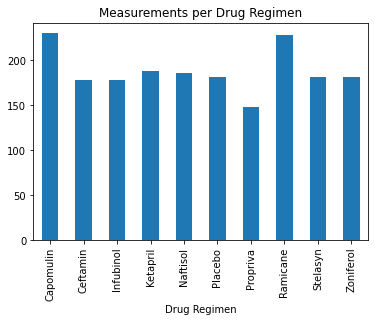

In [28]:
# measurementsPerRegimen.plot.bar(legend="", title="Measurements per Drug Regimen")
data.plot.bar(legend="", title="Measurements per Drug Regimen")

In [29]:
# 8 Generate a bar plot showing the total number of measurements taken on
# each drug regimen using pyplot.

In [30]:
xValues = [1,2,3,4,5,6,7,8,9,10]
xValues    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [31]:
# for i in list(measurementsPerRegimen):
#    print(measurementsPerRegimen[i].tolist())
for i in list(data):
    yValues = print(data[i].tolist())

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]


In [32]:
# millions of voices suddenly cried out in terror
yValues = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

<BarContainer object of 10 artists>

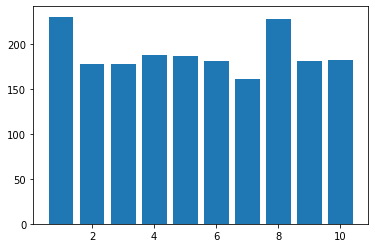

In [33]:
plt.bar(xValues, yValues)

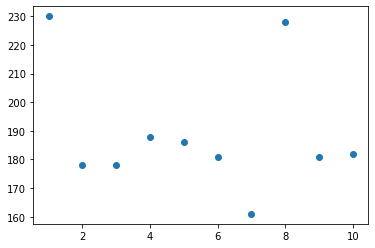

In [34]:
# plt.scatter(measurementsPerRegimen)
plt.scatter(xValues, yValues)

# measurementsPerRegimen.plot.bar(legend="")
# plt.ylabel("measurements")
# plt.title("Measurements per Drug Regimen")

In [35]:
# 9 Generate a pie plot showing the distribution of female versus male mice using pandas
# This is going to use merged_df.
# miceCountByGender = merged_df.groupby(["Gender"]).count()
# miceCountByGender

miceByGender = merged_df.groupby(by="Sex").count()
miceByGender

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


In [36]:
miceFemale = miceByGender.iloc[0,0]
miceFemale

922

In [37]:
miceMale = miceByGender.iloc[1,0]
miceMale

958

In [38]:
miceByGender = [miceFemale, miceMale]

([<matplotlib.patches.Wedge at 0x7f8ac9417240>,
 [Text(1.0995024239828841, -0.03308201408261562, 'female'),
  Text(-1.0995024239828841, 0.03308201408261592, 'male')])

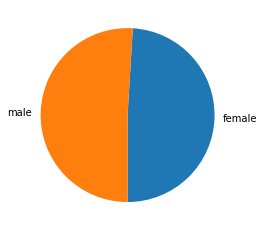

In [39]:
# 10 Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(miceByGender, labels=["female", "male"], startangle=-90)


## Quartiles, Outliers and Boxplots

In [40]:
# 11 Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [41]:
# Seems like first I should get only values for the four regimens:
isRamicane = merged_df["Drug Regimen"]=="Ramicane"
isRamicane

0        True
1        True
2        True
3        True
4        True
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Drug Regimen, Length: 1880, dtype: bool

In [42]:
RamicaneMice = merged_df[isRamicane]

In [43]:
RamicaneMice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


In [44]:
CapomulinMice = merged_df[merged_df["Drug Regimen"]=="Capomulin"]
CapomulinMice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [45]:
InfubinolMice = merged_df[merged_df["Drug Regimen"]=="Infubinol"]
InfubinolMice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [46]:
CeftaminMice = merged_df[merged_df["Drug Regimen"]=="Ceftamin"]
CeftaminMice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [47]:
fourRegimensMice = CapomulinMice.append(RamicaneMice)
fourRegimensMice = fourRegimensMice.append(InfubinolMice)
fourRegimensMice = fourRegimensMice.append(CeftaminMice)
fourRegimensMice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [48]:
isFinal = [fourRegimensMice["Timepoint"]=="45"]
isFinal

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


[10      False
 11      False
 12      False
 13      False
 14      False
         ...  
 1851    False
 1852    False
 1853    False
 1854    False
 1855    False
 Name: Timepoint, Length: 814, dtype: bool]

In [54]:
# finalTumorVolumeMice = fourRegimensMice[isFinal]
# finalTumorVolumeMice

In [55]:
# finalTumorVolumeMice = fourRegimensMice.groupby(["Timepoint"]).max()
# CeftaminMice = merged_df[merged_df["Drug Regimen"]=="Ceftamin"]

In [56]:
# finalTumorVolumes = merged_df.groupby(["Mouse ID"]).max()["Tumor Volume (mm3)"]
# finalTumorVolumes

In [57]:
# tumorVolMean = merged_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

In [58]:
# Start by getting the last (greatest) timepoint for each mouse
fourRegimensMice = merged_df.groupby(["Mouse ID"]).max()["Timepoint"] 
fourRegimensMice = fourRegimensMice.reset_index()
fourRegimensMice
# 12 Merge this group df with the original dataframe to get the tumor volume at the last timepoint
fourRegMiceData = pd.merge(fourRegimensMice, merged_df, on=["Mouse ID", "Timepoint"])
fourRegMiceData

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [ ]:
# 13 Put treatments into a list for for loop (and later for plot labels)


# 14 Create empty list to fill with tumor vol data (for plotting)


# 15 Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# 16 Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# 17 Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# 18 Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# 19 Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
